In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.cluster import KMeans

Tao mot thi mau va tinh toan do tuong tu:
\ma tran do tuong tu S:
0.00	0.67	0.58	0.58	0.25	0.00	0.00	0.00	
0.67	0.00	0.67	0.67	0.00	0.33	0.33	0.00	
0.58	0.67	0.00	0.58	0.25	0.00	0.00	0.00	
0.58	0.67	0.58	0.00	0.25	0.00	0.00	0.00	
0.25	0.00	0.25	0.25	0.00	0.33	0.33	0.67	
0.00	0.33	0.00	0.00	0.33	0.00	0.83	0.33	
0.00	0.33	0.00	0.00	0.33	0.83	0.00	0.33	
0.00	0.00	0.00	0.00	0.67	0.33	0.33	0.00	

Thực hiện phân cụm...


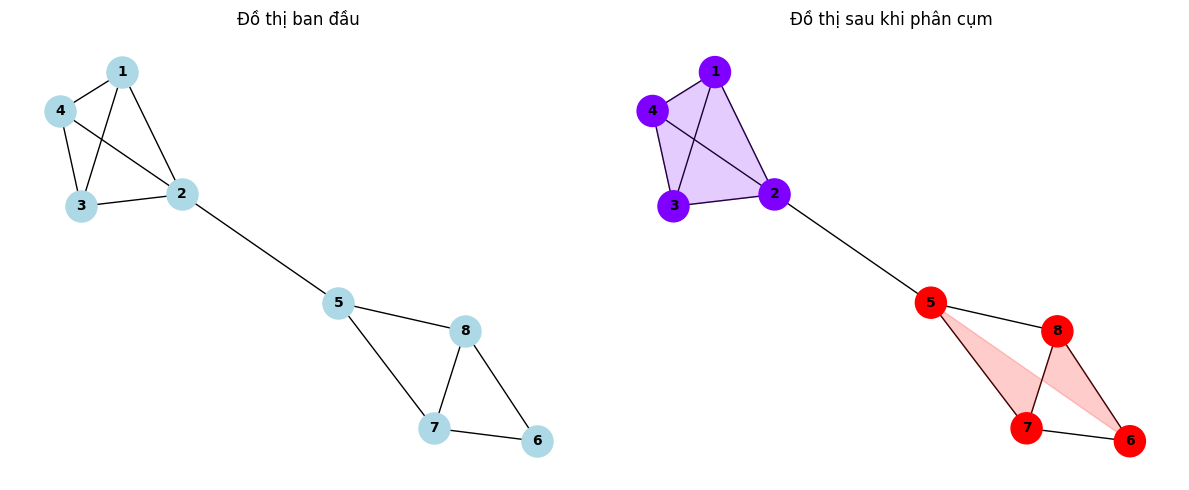

In [10]:
class NodeSimilarity:
    def __init__(self, graph):
        self.graph = graph
        self.n_nodes = len(graph.nodes())
        self.similarity_matrix = np.zeros((self.n_nodes, self.n_nodes))
        self.node_list = list(graph.nodes())
    def  get_neighbors(self, node):
        return set(self.graph.neighbors(node))
    def get_node_degree(self, node):
        return self.graph.degree(node)

    def calculate_similarity_matrix(self):
        for i, node_i in enumerate(self.node_list):
            for j, node_j in enumerate(self.node_list):
                if i == j:
                    self.similarity_matrix[i][j] = 0
                    continue

                # T(i)
                neighbors_i = self.get_neighbors(node_i)
                # T(j)
                neighbors_j = self.get_neighbors(node_j)
                # T(2) intersection T(j)
                common_neighbors = neighbors_i.intersection(neighbors_j)

                if not common_neighbors:
                    self.similarity_matrix[i][j] = 0
                else:
                    similarity = sum(1/self.get_node_degree(z) for z  in common_neighbors)
                    self.similarity_matrix[i][j] = similarity
    def print_similarity_matrix(self):
        print("\ma tran do tuong tu S:")
        for i, node_i in enumerate(self.node_list):
            for j, _ in enumerate(self.node_list):
                print(f"{self.similarity_matrix[i][j]:.2f}", end = "\t")
            print()
    def apply_kmeans_clustering(self, n_cluster = 2):
        kmeans  = KMeans(n_clusters=n_cluster, random_state=42)
        return kmeans.fit_predict(self.similarity_matrix)
    def visualize_clustering(self, labels):
        plt.figure(figsize=(12, 5))

        # Vẽ đồ thị gốc
        plt.subplot(121)
        pos = nx.spring_layout(self.graph, seed=42)
        nx.draw(
            self.graph,
            pos,
            with_labels=True,
            node_color="lightblue",
            node_size=500,
            font_size=10,
            font_weight="bold",
        )
        plt.title("Đồ thị ban đầu")

        # Vẽ đồ thị đã phân cụm
        plt.subplot(122)
        colors = plt.cm.rainbow(np.linspace(0, 1, len(set(labels))))
        nx.draw(
            self.graph,
            pos,
            with_labels=True,
            node_color=[colors[label] for label in labels],
            node_size=500,
            font_size=10,
            font_weight="bold",
        )

        # Vẽ vùng bao quanh cho các cụm
        for cluster_id in set(labels):
            cluster_nodes = [
                node for i, node in enumerate(self.node_list) if labels[i] == cluster_id
            ]
            cluster_pos = np.array([pos[node] for node in cluster_nodes])
            if len(cluster_pos) > 0:
                hull = plt.matplotlib.patches.Polygon(
                    cluster_pos, alpha=0.2, color=colors[cluster_id]
                )
                plt.gca().add_patch(hull)

        plt.title("Đồ thị sau khi phân cụm")
        plt.tight_layout()
        plt.show()


def create_example_graph():
    G = nx.Graph()
    edges = [(1,2),(1,3),(1,4),(2,3),(2,4),(2,5),(3,4),(5,7),(5,8),(6,7),(6,8),(7,8)]
    G.add_edges_from(edges)
    return G
def main():
    print("Tao mot thi mau va tinh toan do tuong tu:")
    G = create_example_graph()
    ns = NodeSimilarity(G)
    ns.calculate_similarity_matrix()
    ns.print_similarity_matrix()

    print("\nThực hiện phân cụm...")
    cluster_labels = ns.apply_kmeans_clustering(n_cluster=2)
    ns.visualize_clustering(cluster_labels)
if __name__ == "__main__":
    main()